# Autoregressive Process 

The process is basically the same as Moving Average (MA) process but instead of the ACF become abruptly non-significant after lag q, it has a slowly decaying trend. This is an indicative of an autoregressive (AR) process of order p, also denoted as AR(p). In this case, we must plot the Partial Autocorrelation Function (PACF) to find the order p. Just like the coefficients on an ACF plot for MA(q) process, the coefficients on the PACF plot will become abruptly non-significant after lag p, hence determining the order of the autoregressive process. 

White noise = referring to the data has no pattern as the frequencies are all evenly distributed

In [1]:
import pandas as pd 
import numpy as np

data = pd.read_csv('C:/Users/Drew/Downloads/foot_traffic.csv')
data.head()

,foot_traffic
0,500.496714
1,500.522366
2,501.426876
3,503.295990
4,504.132695


In [2]:
data.describe()

,foot_traffic
count,1000.000000
mean,493.370272
std,87.573218
min,377.234968
25%,427.289387
50%,471.470980
75%,538.854388
max,736.065341


# Identifying a Autoregressive (AR) Process

# Finding the order of a stationary Autoregressive (AR) process

- Gather data
- Is it stationary? No -> Apply Transformations
- Yes -> Plot ACF
- Is there autocorrelation? No -> It is a random walk
- Yes -> Do autocorrelations coefficients become abruptly non-significant after lag q? Yes -> It is an MA(q) process
- No -> Plot PACF
- Do coefficients become abruptly non-significant after lag p? No -> Not an AR(p) process
- Yes -> It is an AR(p) process
  

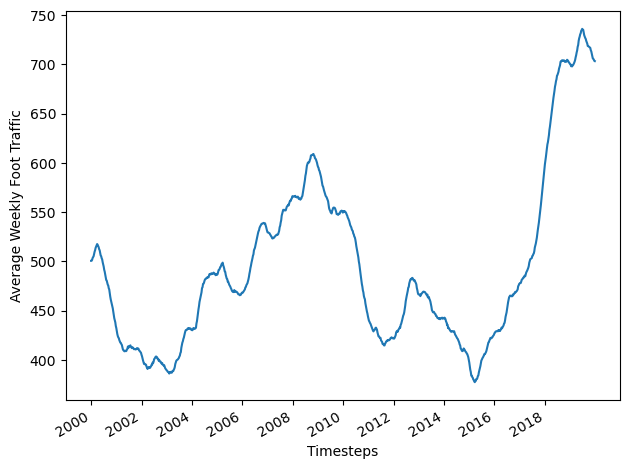

In [3]:
import matplotlib.pyplot as pt

fig,ax = pt.subplots()
ax.plot(data['foot_traffic'])
ax.set_xlabel('Timesteps')
ax.set_ylabel('Average Weekly Foot Traffic')
pt.xticks(np.arange(0,1000, 100), np.arange(2000,2020,2))
fig.autofmt_xdate()
pt.tight_layout()

There is no cyclical pattern, so we can rule out the presence of seasonality. As for trend, it is sometimes positive and sometimes negative throughout the years, with the most recent trend being positive, since 2016.

In [4]:
#Check stationarity
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(data['foot_traffic'])
print(f'ADF Statistic: {ADF_result[0]}')
print(f'P-Value: {ADF_result[1]}')

ADF Statistic: -1.1758885999240796
P-Value: 0.6838808917896169


Since the ADF statistic does not have a large negative value and the p-value is greater than 0.05. We cannot reject the null hypothesis. Therefore, we must apply transformations to make it stationary. To remove the effect of the trend and stabilizing the mean, we will use differencing:

In [5]:
foot_traffic_diff = np.diff(data['foot_traffic'], n=1)

In [6]:
ADF_result_diff = adfuller(foot_traffic_diff)
print(f'ADF Statistic: {ADF_result_diff[0]}')
print(f'P-Value: {ADF_result_diff[1]}')

ADF Statistic: -5.268231347422036
P-Value: 6.3693176547815014e-06


Now our data is stationary as we have a large negative ADF value and a p-value not greater than 0.05. Thus, we can reject the null hypothesis and claim it to be stationary.

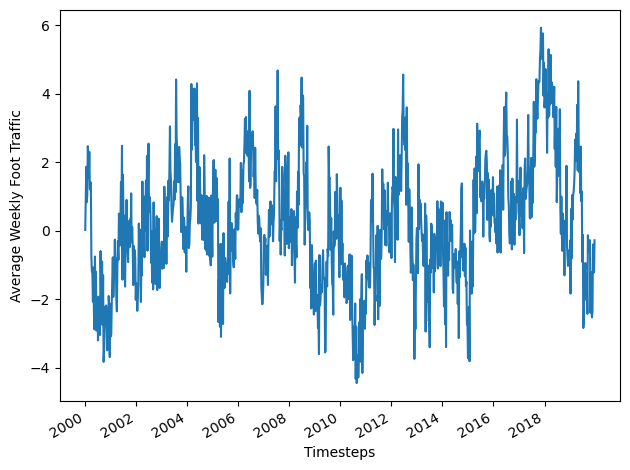

In [7]:
fig,ax = pt.subplots()
ax.plot(foot_traffic_diff)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Average Weekly Foot Traffic')
pt.xticks(np.arange(0,1000, 100), np.arange(2000,2020,2))
fig.autofmt_xdate()
pt.tight_layout()

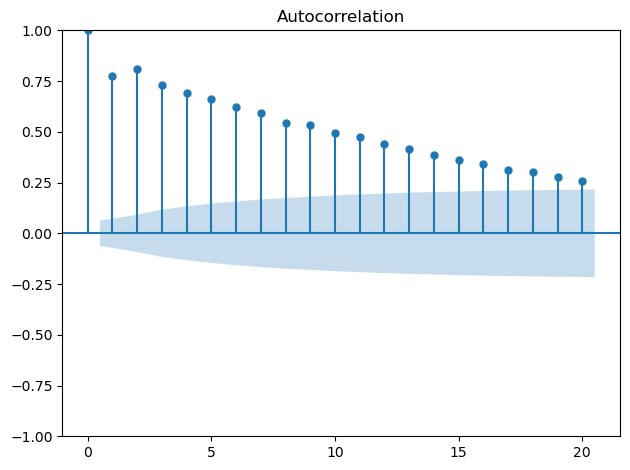

In [8]:
#Since its stationary already, plot the ACF

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(foot_traffic_diff, lags=20)
pt.tight_layout()

There is a significant autocorrelation coefficients beyond lag 0. Thus, we know that our process is not a random walk. Furthermore, you'll notice that the coefficients are decaying exponentially as the lag increases. Therefore, there is no lag at which the coefficients abruptly become non-significant. This means that we do not have a moving average process and that we are likely studying an autoregressive process.

When the ACF plot of a stationary process exhibits a pattern of exponential decay, we probably have an autoregressive process in play, and we must find another way to identify the order p of the AR(p) process. Hence, Partial Autocorrelation function (PACF) plot.

# Partial Autocorrelation Function (PACF)

Partial Autocorrelation measures the correlation between lagged values in a time series when we remove the influence of correlated lagged values in between. We can plot the partial autocorrelation function to determine the order of a stationary AR(p) process. The coefficients will be non-significant after lag p. 



Since we could not identify the order of a stationary autoregressive process with the ACF plot, we must use the partial autocorrelation function (PACF) plot. Remember that the autocorrelation measures the linear relationship between lagged values of a time series. Consequently, the autocorrelation function measures how the correlation changes between two values ase lag is increased.


Assuming we have this following AR(2) process as a scenario: 
                                            
                                            yt = 0.33yt-1 + 0.50yt-2
                                  
We wish to measure how yt relates to yt-2; in other words, we want to measure their correlation. This is done with the autocorrelation function (ACF). However, from the equation, we can see that yt-1 also has an influence on yt. Even more important, it also has an impact on the value of yt-2, Since in an AR(2) process, each value depends on the previous two values. Therefore, when we measure the autocorrelation between yt and yt-2 using the ACF, we are not taking into account the fact that yt-1 has an influence on both yt and yt-2. This means that we are not measuing the TRUE impact of yt-2 on yt. To do so, we must remove the effect of yt-1. Thus, we are measuring the partial autocorrelation between yt and yt-2.

Below will be trying to verify whether plotting the PACF will reveal the order of the process shown in the equation above. We know from the equation that we have a second-order autoregressive (AR) process or AR(2)..



In [9]:
from statsmodels.tsa.arima_process import ArmaProcess

np.random.seed(42)
#coefficients of the MA(q) process to 0 since we are only interested in simulating AR(p) process
#Note that the first coefficient is 1 for lag 0, and it must be provided as specified by the documentation
ma2 = np.array([1,0,0])
#Again, the coefficients is 1 at lag 0. Then write the coefficients with OPPOSITE signs to what was defined in the equation as specified in the documentation.
ar2 = np.array([1, -0.33, -0.50])

AR2_process = ArmaProcess(ar2, ma2).generate_sample(nsample=1000)

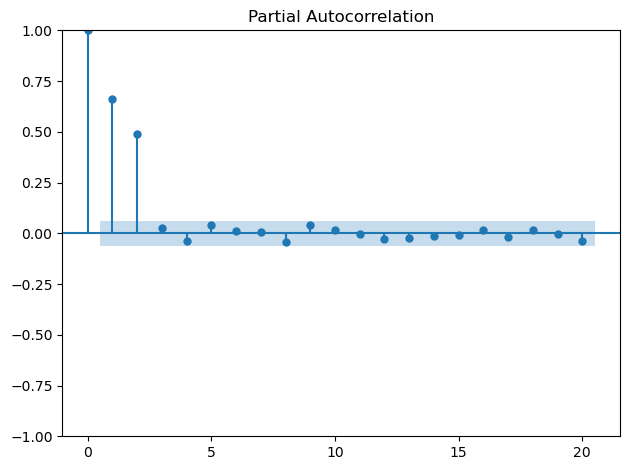

In [10]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(AR2_process, lags=20)
pt.tight_layout()

We know that we can use the PACF plot to identify the order of a stationary AR(p) process. The coefficients in the PACF plot will be significant up until lag p. Afterward, they should be not significantly different from 0.

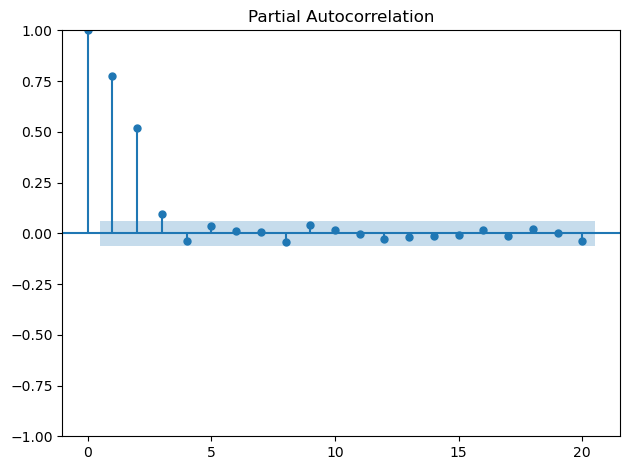

In [11]:
#Back to Foot Traffic
plot_pacf(foot_traffic_diff, lags=20)
pt.tight_layout()

As per the PACF plot above, we can see that there are no significant coefficients after lag 3. Even the coefficients are slightly above the shaded area by a little, is also considered as a significant coefficient. Therefore, the differenced average weekly foot traffic is an autoregressive process of order 3, which can also be denoted as AR(3).

# Forecasting an Autoregressive Process

Once the order is detrermined, we can fit an autoregressive model to forecast our time series. In this case, the model is also termed AR(p), where p is still the order the process. 

In [12]:
data_diff = pd.DataFrame({'foot_traffic_diff': foot_traffic_diff})

train = data_diff[:-52]
test = data_diff[-52:]

print(len(train))
print(len(test))

947
52


Notice that the total length of the dataset is just 999 instead of our original dataset 1000? This is normal because we applied differencing to make the series stationary, and we know that differencing removes the first data point from the series.

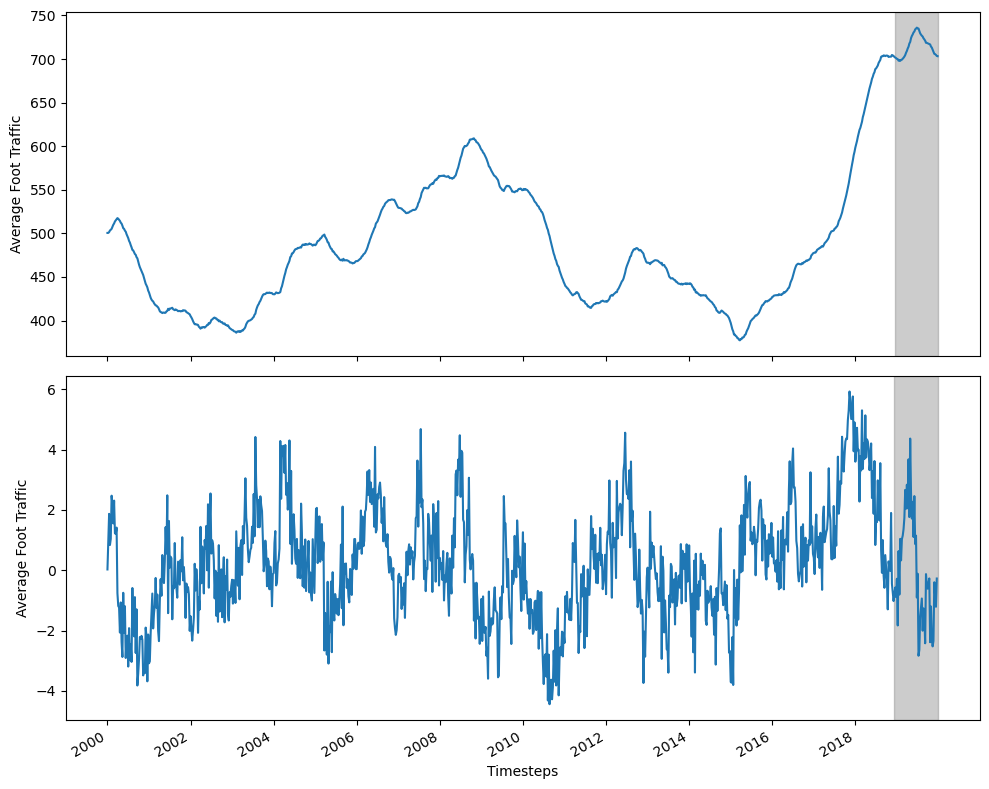

In [18]:
fig, (ax1, ax2) = pt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10,8))
ax1.plot(data['foot_traffic'])
ax1.set_xlabel('Timesteps')
ax1.set_ylabel('Average Foot Traffic')
ax1.axvspan(948, 1000, color="#808080", alpha=0.4)

ax2.plot(data_diff['foot_traffic_diff'])
ax2.set_xlabel('Timesteps')
ax2.set_ylabel('Average Foot Traffic')
ax2.axvspan(947, 999, color="#808080", alpha=0.4)

pt.xticks(np.arange(0,1000,100),
          np.arange(2000, 2020, 2))
fig.autofmt_xdate()
pt.tight_layout()

Our objective is to forecast next week's average foot traffic at the retail store, we will perform rolling forecasts over our test set. Remember that our data was recorded over a weekly period, so predicting the next timestep means we're forecasting next week's average foot traffic. 

We will use three different methods, the mean and last value method will act as a baseline method and the another method will be the AR(3) model. Lastly, we will use the Mean squared error (MSE) to evaluate the performance of the methods.

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

#The function takes in a DataFrame containing the full simulated moving average process. 
#Train_len: have to pass in the length of training set
#Horizon: have to pass in the length of test set
#Window: How many timesteps we want to predict
#Method: the method we are using
def rolling_forecast(data: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:
    total_len = train_len + horizon

    if method == 'mean' :
        pred_mean = []
        for i in range(train_len, total_len, window):
            mean = np.mean(data[:i].values)
            pred_mean.extend(mean for _ in range(window))
        return pred_mean

    elif method == 'last':
        pred_last_value = []
        for i in range(train_len, total_len, window):
            last_value = data[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range (window))
        return pred_last_value

    elif method == 'AR':
        pred_AR= []
        for i in range(train_len, total_len, window):
            model = SARIMAX(data[:i], order = (3,0,0))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_AR.extend(oos_pred)
        return pred_AR

In [46]:
pred_data = test.copy()
TRAIN_LEN = len(train)
HORIZON = len(test)
WINDOW = 1 #Since we wish to predict the next timestep, our window is 

pred_mean = rolling_forecast(data_diff, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_last = rolling_forecast(data_diff, TRAIN_LEN, HORIZON, WINDOW, 'last')
pred_AR = rolling_forecast(data_diff, TRAIN_LEN, HORIZON, WINDOW, 'AR')

pred_data['pred_mean'] = pred_mean
pred_data['pred_last'] = pred_last
pred_data['pred_AR'] = pred_AR

pred_data.head()

,foot_traffic_diff,pred_mean,pred_last,pred_AR
947,-0.776601,0.213270,-1.021893,-0.719714
948,-0.574631,0.212226,-0.776601,-0.814547
949,-0.890697,0.211397,-0.574631,-0.664738
950,-0.283552,0.210237,-0.890697,-0.641469
951,-1.830685,0.209717,-0.283552,-0.579279


Since we are working with differenced data, our predictions are also differenced values

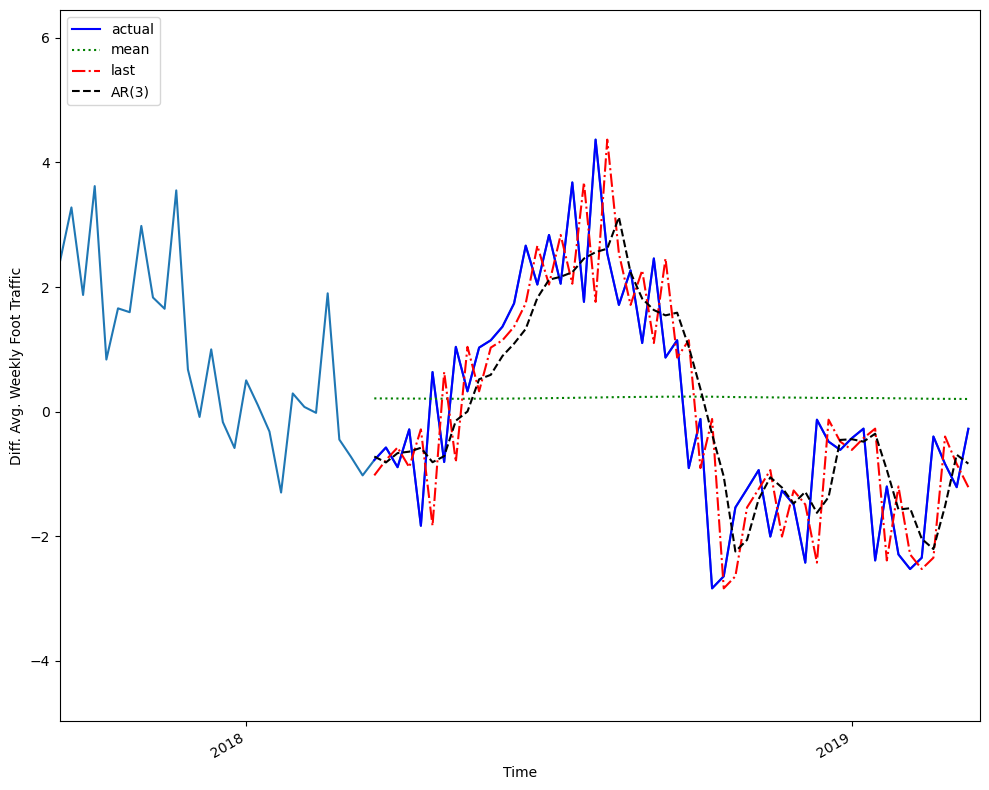

In [47]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data_diff['foot_traffic_diff']) #Plot part of the training set so we can see the transition from training set to test set.
ax.plot(test['foot_traffic_diff'], 'b-', label='actual')
ax.plot(test['pred_mean'], 'g:', label='mean')
ax.plot(test['pred_last'], 'r-.', label='last')
ax.plot(test['pred_AR'], 'k--', label='AR(3)')

ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Diff. Avg. Weekly Foot Traffic')

ax.set_xlim(920, 999)
pt.xticks([936, 988], [2018, 2019])

fig.autofmt_xdate()
pt.tight_layout()

As expected, the historical mean produces just a straight line because we performed differencing to the data to stabilize the mean in order to make the data stationary. As for the predictions from the AR(3) model and the last known value method, the curves are almost confounding with that of the test set, so we will have to measure the MSE to assess which method is the most performant. Again, we will use the mean_squared_error function from the sklearn library.

In [48]:
from sklearn.metrics import mean_squared_error

mean_mse = mean_squared_error(pred_data['foot_traffic_diff'], pred_data['pred_mean'])
mean_last = mean_squared_error(pred_data['foot_traffic_diff'], pred_data['pred_last'])
mean_AR = mean_squared_error(pred_data['foot_traffic_diff'], pred_data['pred_AR'])

print("The MSE of Mean is: ", mean_mse)
print("The MSE of Last is: ", mean_last)
print("The MSE of AR is: ", mean_AR)

The MSE of Mean is:  3.1079979374701447
The MSE of Last is:  1.448730118495964
The MSE of AR is:  0.9242479164603883


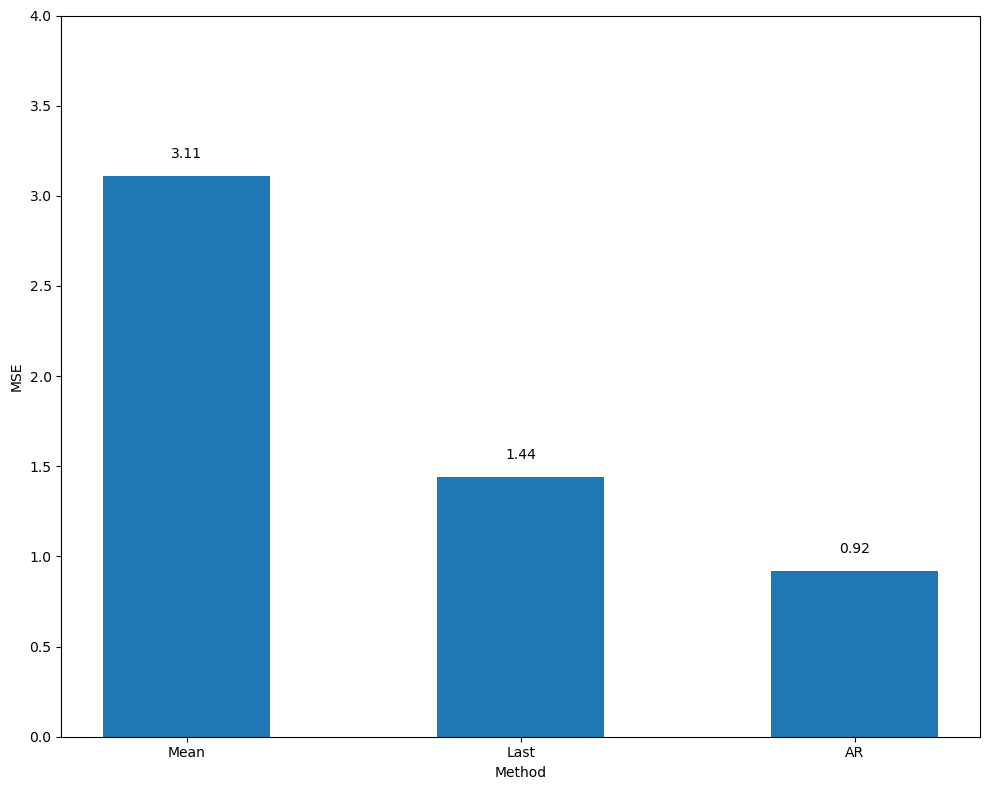

In [49]:
fig, ax = pt.subplots(figsize=(10,8))

x = ['Mean', 'Last', 'AR']
y = [3.11, 1.44, 0.92]

ax.bar(x, y, width = 0.5)
ax.set_xlabel('Method')
ax.set_ylabel('MSE')
ax.set_ylim(0,4)

for index, value in enumerate(y):
    pt.text(x=index, y=value+0.1, s=str(value), ha='center')

pt.tight_layout()

Since the AR(3) model has the lowest MSE, we can conclude that the AR(3) model is the best-performing method for forecasting next week's average foot traffic. This is expected, since we established that our stationary process was a third-order autoregressive process. It makes sense that modeling using an AR(3) model will yield the best predictions.

Since our forecasts are differenced values, now we have to reverse the transformation in order to bring our forecasts back to the original scale of the data; otherwise, our predictions will not make sense in a business context. To do this, we can take the cumulative sum of our predictions and add it to the last value of our training set in the original series. This point occurs at index 948, since we are forecasting the last 52 weeks in a dataset containing 1000 points.

In [52]:
data['pred_foot_traffic'] = pd.Series()
data['pred_foot_traffic'][948:] = data['foot_traffic'].iloc[948] + pred_data['pred_AR'].cumsum()

C:\Users\Drew\AppData\Local\Temp\ipykernel_3500\1683089610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pred_foot_traffic'][948:] = data['foot_traffic'].iloc[948] + pred_data['pred_AR'].cumsum()


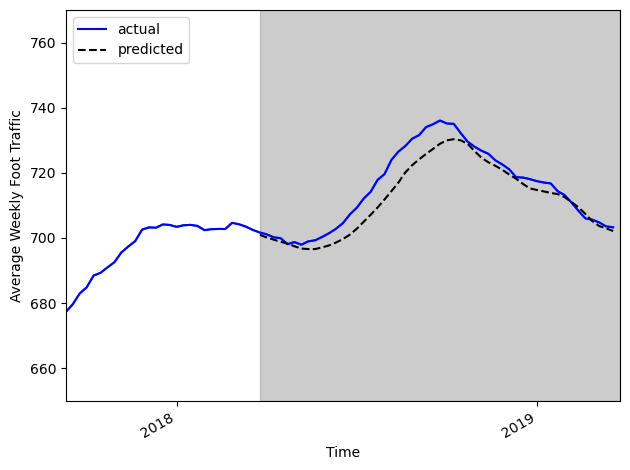

In [53]:
fig, ax = pt.subplots()

ax.plot(data['foot_traffic'])
ax.plot(data['foot_traffic'], 'b-', label='actual')
ax.plot(data['pred_foot_traffic'], 'k--', label='predicted')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Average Weekly Foot Traffic')
ax.axvspan(948,1000, color='#808080', alpha=0.4)
ax.set_xlim(920,1000)
ax.set_ylim(650, 770)
pt.xticks([936,988],[2018,2019])

fig.autofmt_xdate()
pt.tight_layout()

Lastly, we can measure the mean absolute error (MAE) on the original dataset to get its meaning in a business context. We'll simply measure the MAE using undifferenced predictions.

In [54]:
from sklearn.metrics import mean_absolute_error

mae_AR_undiff = mean_absolute_error(data['foot_traffic'][948:], data['pred_foot_traffic'][948:])
print(mae_AR_undiff)

3.4780335553330417


This prints out the MAE of 3.47. This means that our predictions are off by 3.47 people on average, either above or below the actual value for the week's foot traffic. Note that we report MAE because it has simple business meaning that is easy to understand and interpret.

Now that we have done Moving Average (MA) process and Autoregressive (AR) process, and know that moving average relies on the ACF function by observing the autocorrelated coefficients abruptly become non-significant after lag q and autoregressive process will have a slowly decaying trend in the ACF. In this case, we have to use the PACF instead to identify the order by observing the PACF of which the autocorrelated coefficients is significant until lag p. 

However, there are some situations where neither the ACF or PACF give us information. What if both the ACF and PACF plots exhibits a slow decay or a sinusoidal pattern? In that case, there is no order for the MA(q) or AR(p) process that can be inferred. This means we are facing a more complex process that is likely a combination of both AR(p) process and an MA(q) process. This is called Autoregressive moving average (ARMA), or ARMA(p,q). 

# Summary
- An autoregressive process states that the present value is linearly dependent on its past values and an error term.
- If the ACF plot of a stationary process shows a slow decay, then you likely to have an autoregressive process.
- The partial autocorrelation measures the correlation between two lagged values of a time series when you remove the effect of the other autocorrelated lagged values.
- PLotting the PACF of a stationary autoregressive process will show the order p of the process. The coefficients will be significant up until lag p only.